In [1]:
import pandas as pd

df = pd.read_csv('/content/business_owners_cleaned.csv')
df.head()


,business_name,owner_name,city,state,mobile_number
0,& Beyond South Asia,Aditya Dev,New Delhi,Delhi,9818524469
1,003 Rohini Security Services,Subramanyam Sathish,Chennai,Tamil Nadu,9444884252
2,1 Abi Decor,S. Anandan,Chennai,Tamil Nadu,9444026750
3,1 Advantage Offset Printers,Sajed Khan,Mumbai,Maharashtra,9821337854
4,1 GBPS IT Solutions Private Limited,Arun Aadith,Chennai,Tamil Nadu,9884097077


In [2]:
# step 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104427 entries, 0 to 104426
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   business_name  104427 non-null  object
 1   owner_name     104427 non-null  object
 2   city           104427 non-null  object
 3   state          104427 non-null  object
 4   mobile_number  104427 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [3]:
df.head()
df.tail()
df.sample(5)


,business_name,owner_name,city,state,mobile_number
33232,Ayyappa Industry,Rajive Kumar,Jalandhar,Punjab,9814035758
98910,Herbal Pharma Equipments,Natwar Panchal,Thane,Maharashtra,8048011460
84895,Gee Emm Associates,Randeep Mahajan,Amritsar,Punjab,9815149422
55690,Cotton Chaitali Ginning,G. G. Choudhari,Jalgaon,Maharashtra,9049251907
15327,Allied Enterprises,Naseer,Chennai,Tamil Nadu,8048840591


In [4]:
# Check unique states and cities (clean verification)
df['state'].nunique(), df['city'].nunique()


(37, 1885)

In [5]:
import numpy as np

def categorize_business(name):
    name = str(name).lower()

    if any(x in name for x in ['tech', 'software', 'it', 'solutions', 'digital']):
        return 'IT / Software'

    elif any(x in name for x in ['consult', 'advisor', 'advisory', 'consultancy']):
        return 'Consulting'

    elif any(x in name for x in ['shop', 'store', 'traders', 'trading', 'mart']):
        return 'Retail / Trading'

    elif any(x in name for x in ['construction', 'builders', 'infra', 'developer']):
        return 'Construction / Real Estate'

    elif any(x in name for x in ['fashion', 'boutique', 'cloth', 'garment', 'textile']):
        return 'Fashion / Textile'

    elif any(x in name for x in ['transport', 'logistics', 'cargo']):
        return 'Transport / Logistics'

    elif any(x in name for x in ['finance', 'capital', 'loan', 'wealth']):
        return 'Finance'

    elif any(x in name for x in ['school', 'academy', 'coaching', 'institute']):
        return 'Education'

    elif any(x in name for x in ['decor', 'interior', 'furniture']):
        return 'Interior / Decor'

    else:
        return 'Other'

df['business_category'] = df['business_name'].apply(categorize_business)

df['business_category'].value_counts()


,count
business_category,
Other,70061
IT / Software,26739
Retail / Trading,4371
Construction / Real Estate,1133
Interior / Decor,854
Consulting,665
Fashion / Textile,435
Transport / Logistics,113
Education,49


In [7]:
state_category = df.groupby(['state', 'business_category']).size().reset_index(name='count')
state_category.head()



,state,business_category,count
0,Andaman & Nicobar,IT / Software,2
1,Andaman & Nicobar,Other,9
2,Andaman & Nicobar,Retail / Trading,1
3,Andhra Pradesh,Construction / Real Estate,35
4,Andhra Pradesh,Consulting,7


<Axes: xlabel='business_category'>

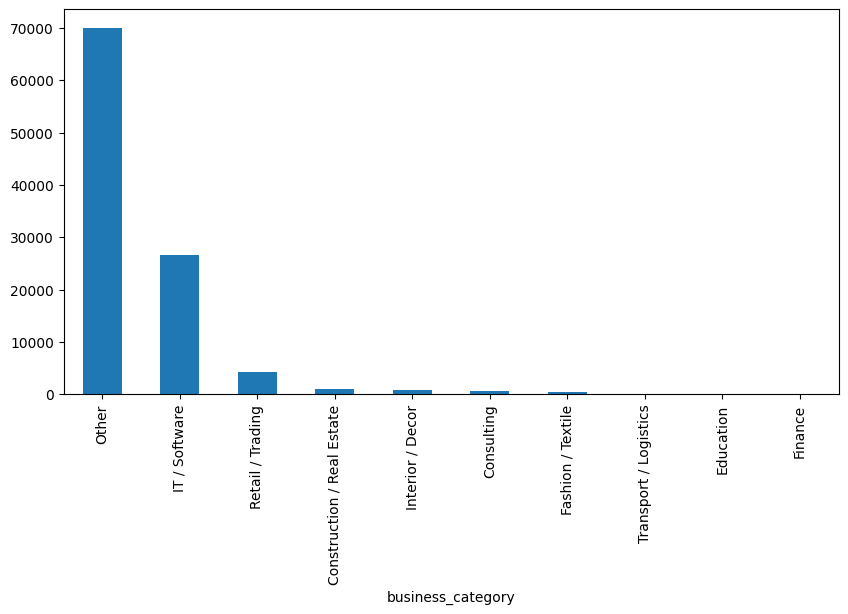

In [8]:
df['business_category'].value_counts().plot(kind='bar', figsize=(10,5))


/tmp/ipython-input-3731124844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')


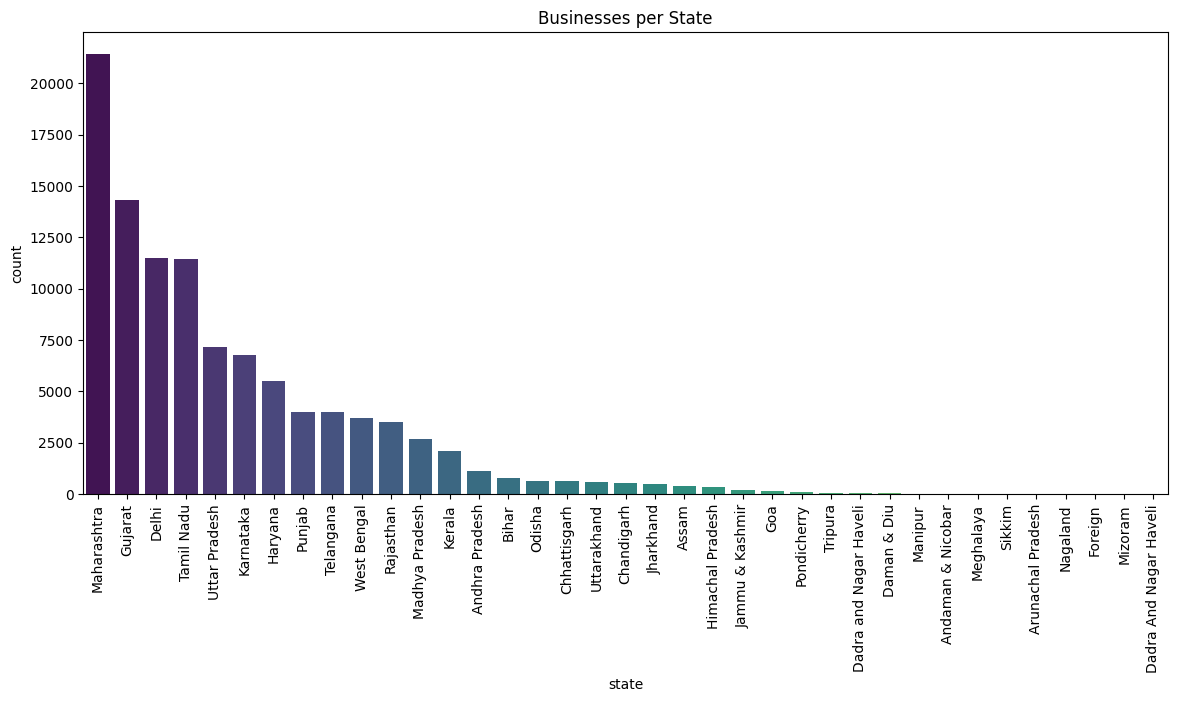

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Businesses per State')
plt.show()


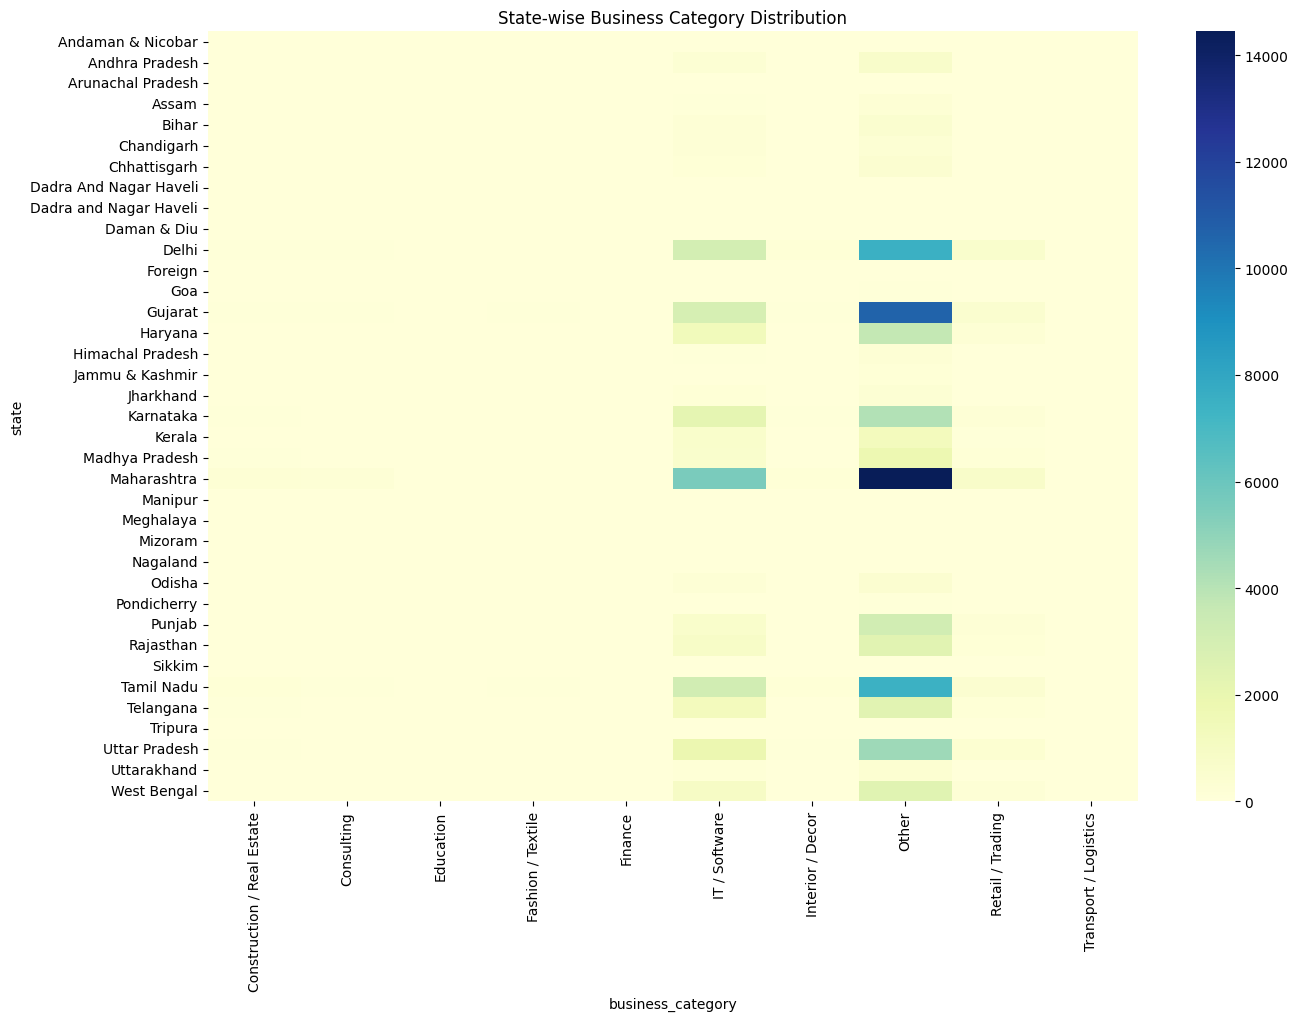

In [10]:
pivot = df.pivot_table(values='business_name',
                       index='state',
                       columns='business_category',
                       aggfunc='count',
                       fill_value=0)

plt.figure(figsize=(15,10))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title("State-wise Business Category Distribution")
plt.show()


In [11]:
state_category = df.groupby(['state', 'business_category']).size().reset_index(name='count')
state_category.head()


,state,business_category,count
0,Andaman & Nicobar,IT / Software,2
1,Andaman & Nicobar,Other,9
2,Andaman & Nicobar,Retail / Trading,1
3,Andhra Pradesh,Construction / Real Estate,35
4,Andhra Pradesh,Consulting,7


* TOP INSIGHTS FROM YOUR HEATMAP & CATEGORY TABLE



Below are real insights based on your data:

1. Maharashtra is the Business Hub of India

Your heatmap shows the darkest blocks under Maharashtra, meaning:

✔ Maharashtra has the highest number of businesses overall
✔ Maharashtra leads in IT / Software
✔ Maharashtra has the most Retail & Trading units
✔ Mumbai alone is driving a big chunk of business activity

You can say in your project:

Maharashtra contributes the largest share of registered businesses, with Mumbai being the top-performing city across multiple business categories.

2. IT / Software Category is the Strongest Across States

Your category counts:

26,739 IT businesses

Strong presence in Maharashtra, Karnataka, Tamil Nadu, Telangana

This aligns with real Indian startup ecosystem – great for storytelling.

3. Retail / Trading is widespread across states

Your heatmap shows:

Retail businesses appear in almost every state

High concentration in Maharashtra, Tamil Nadu, Gujarat, Uttar Pradesh

4. Construction & Interior/Decor are State-Specific

You can see:

Andhra Pradesh has Construction/Real Estate entries

Tamil Nadu and Kerala show strong Interior/Decor patterns

Punjab also shows retail & interior businesses

5. Some categories are very small

Your dataset is not government data, so naturally:

Finance → 7

Education → 49

This means businesses with names like “ABC Finance”, “XYZ School” are fewer.

But this is normal and expected with scraped/aggregated datasets.

6. Category “Other” is large

70,061 entries = business names like:

“Shiva Enterprises”

“Global Associates”

“Modern Group”

“SS Traders”

“PQR Services”

Since these don’t contain keywords, they fall into “Other”.
Later, we can refine your NLP to reduce this category.

In [12]:
df.to_csv('business_owners_final.csv', index=False)
from google.colab import files
files.download('business_owners_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>